In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as m
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier


In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [9]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
df = df.dropna(axis=1)

In [11]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 62, dtype: int64

In [12]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object')

<AxesSubplot:>

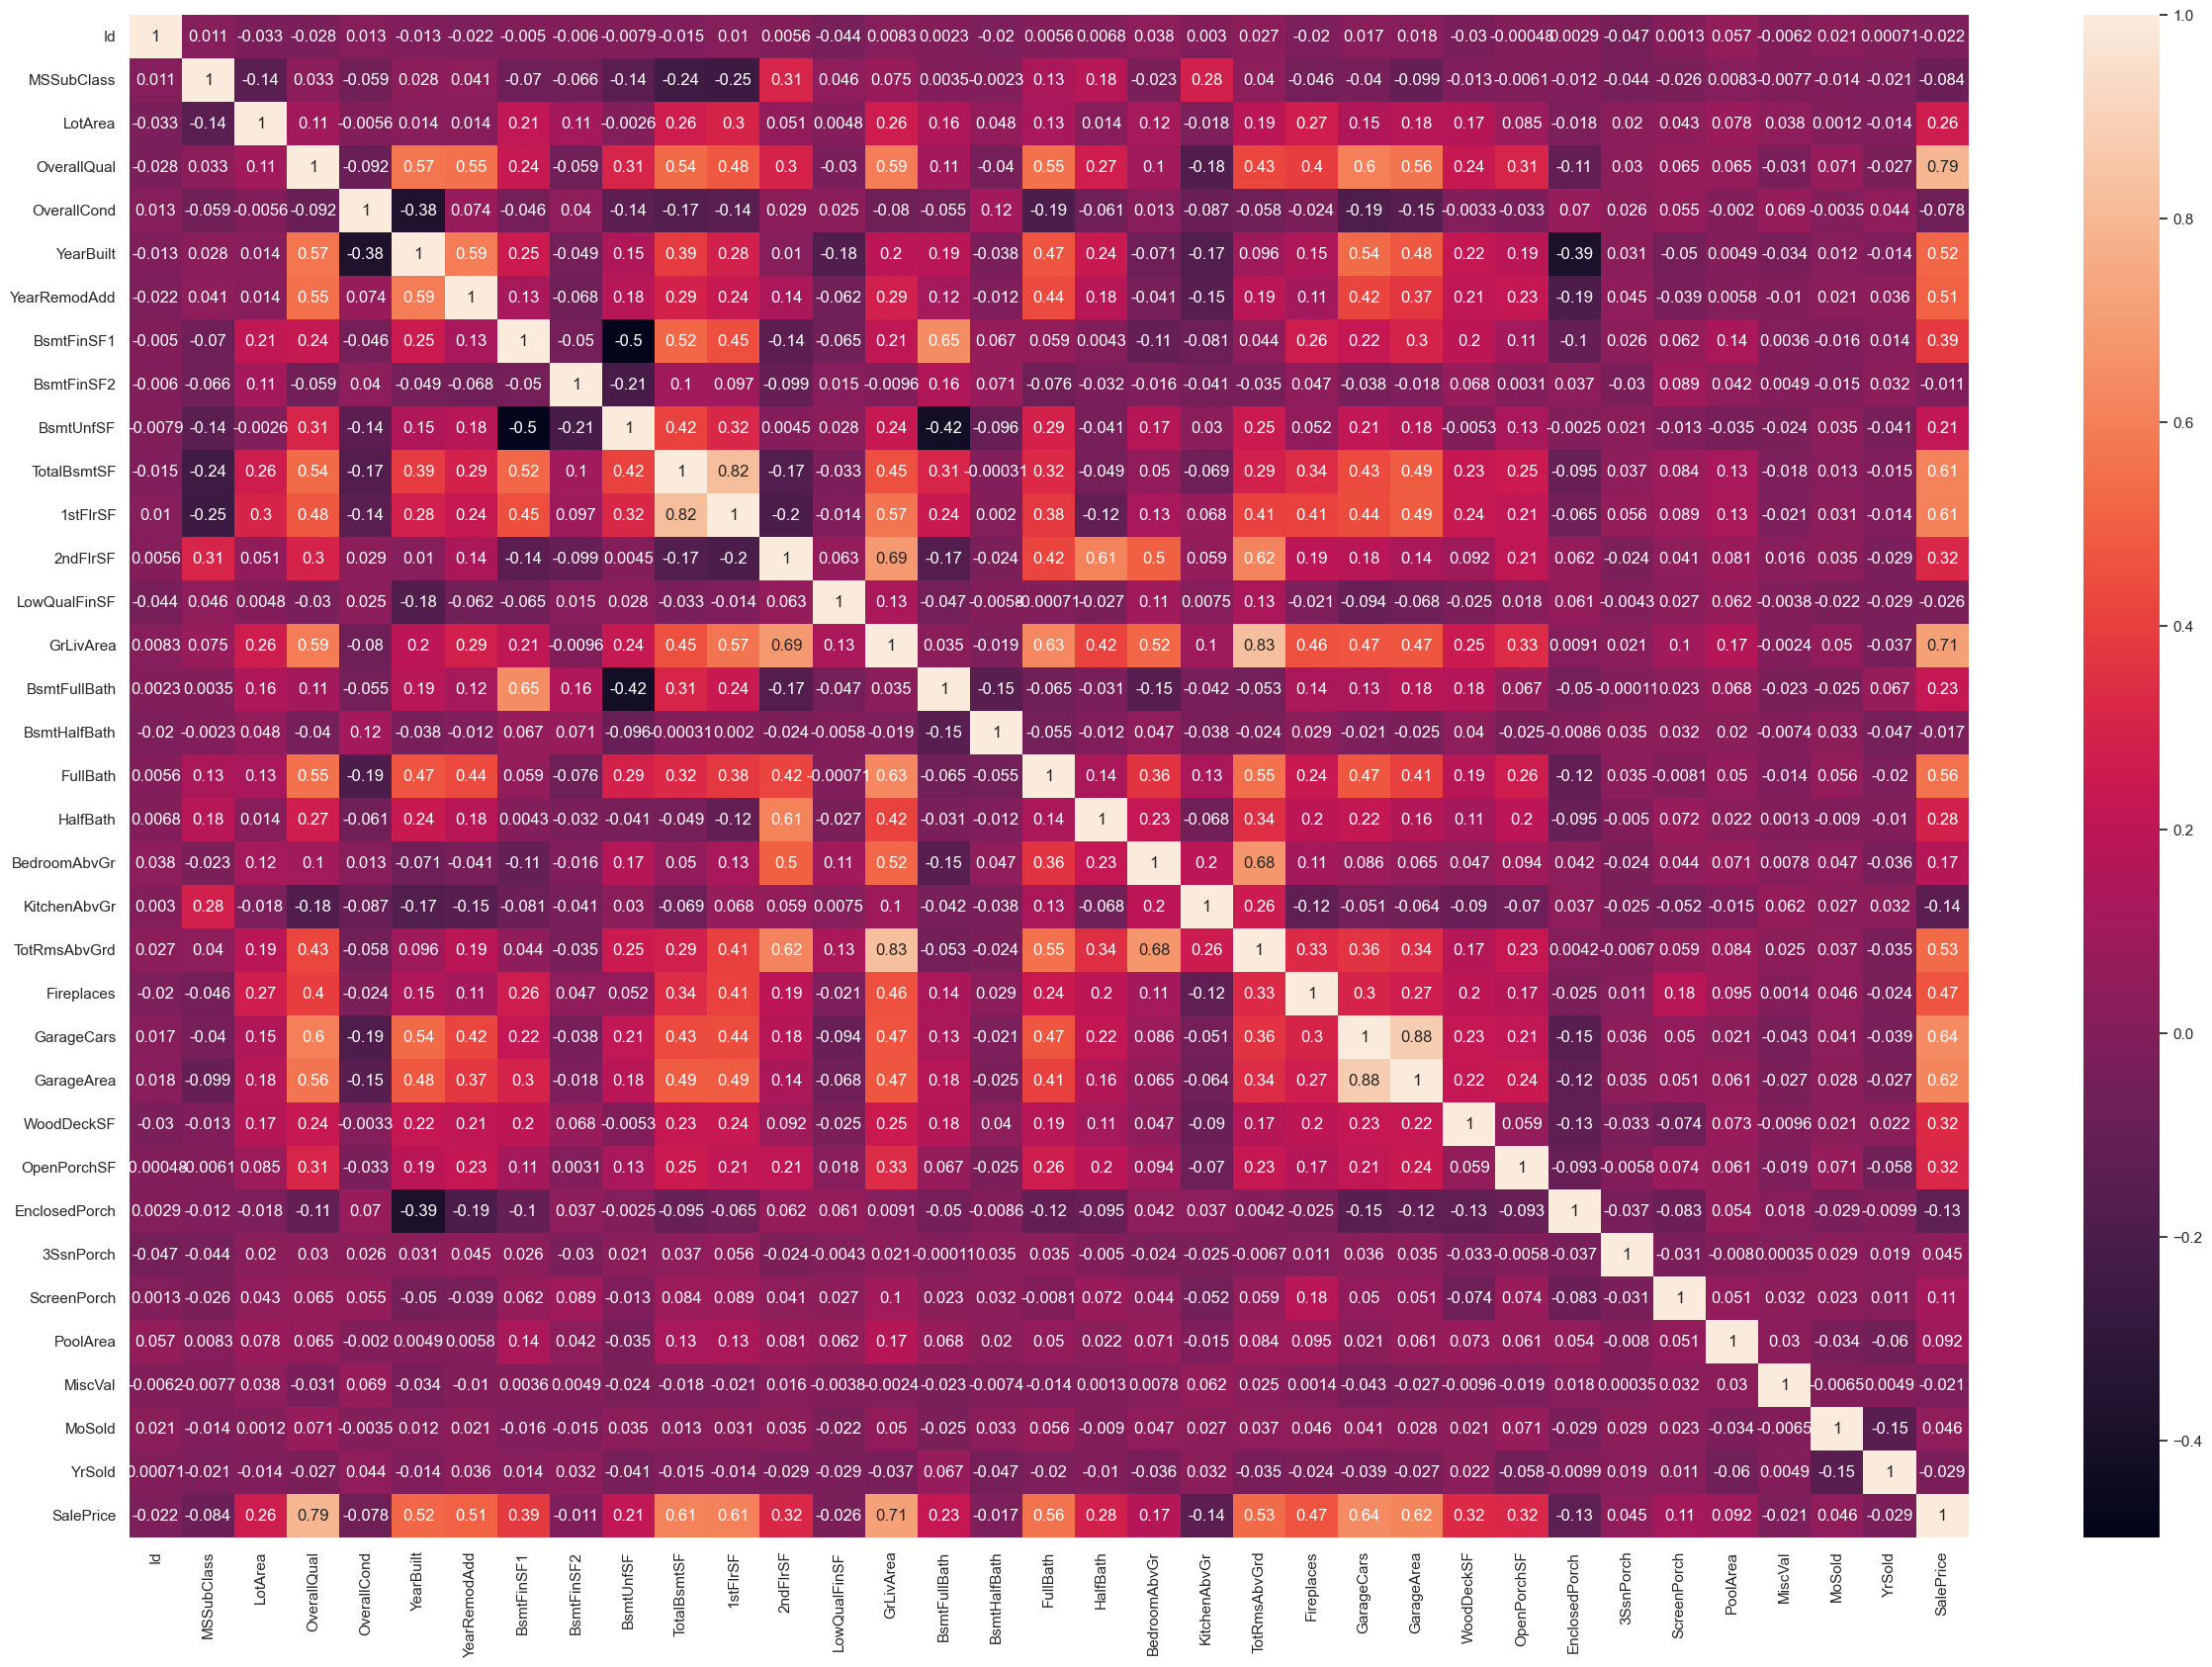

In [13]:
corr = df.corr() 
sns.set(rc = {'figure.figsize':(30,20)})
sns.heatmap(corr, annot=True)

C:\Users\Tonie\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


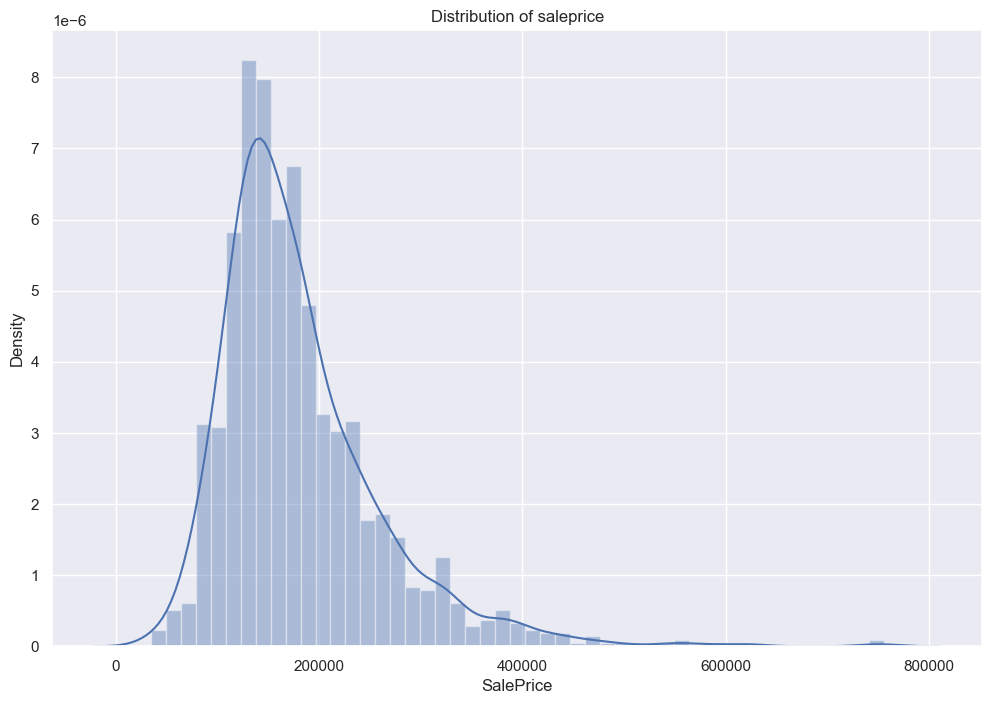

In [14]:
plt.figure(figsize = (12, 8))
sns.distplot(df['SalePrice'], kde = True)
plt.title("Distribution of saleprice")
plt.show()

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

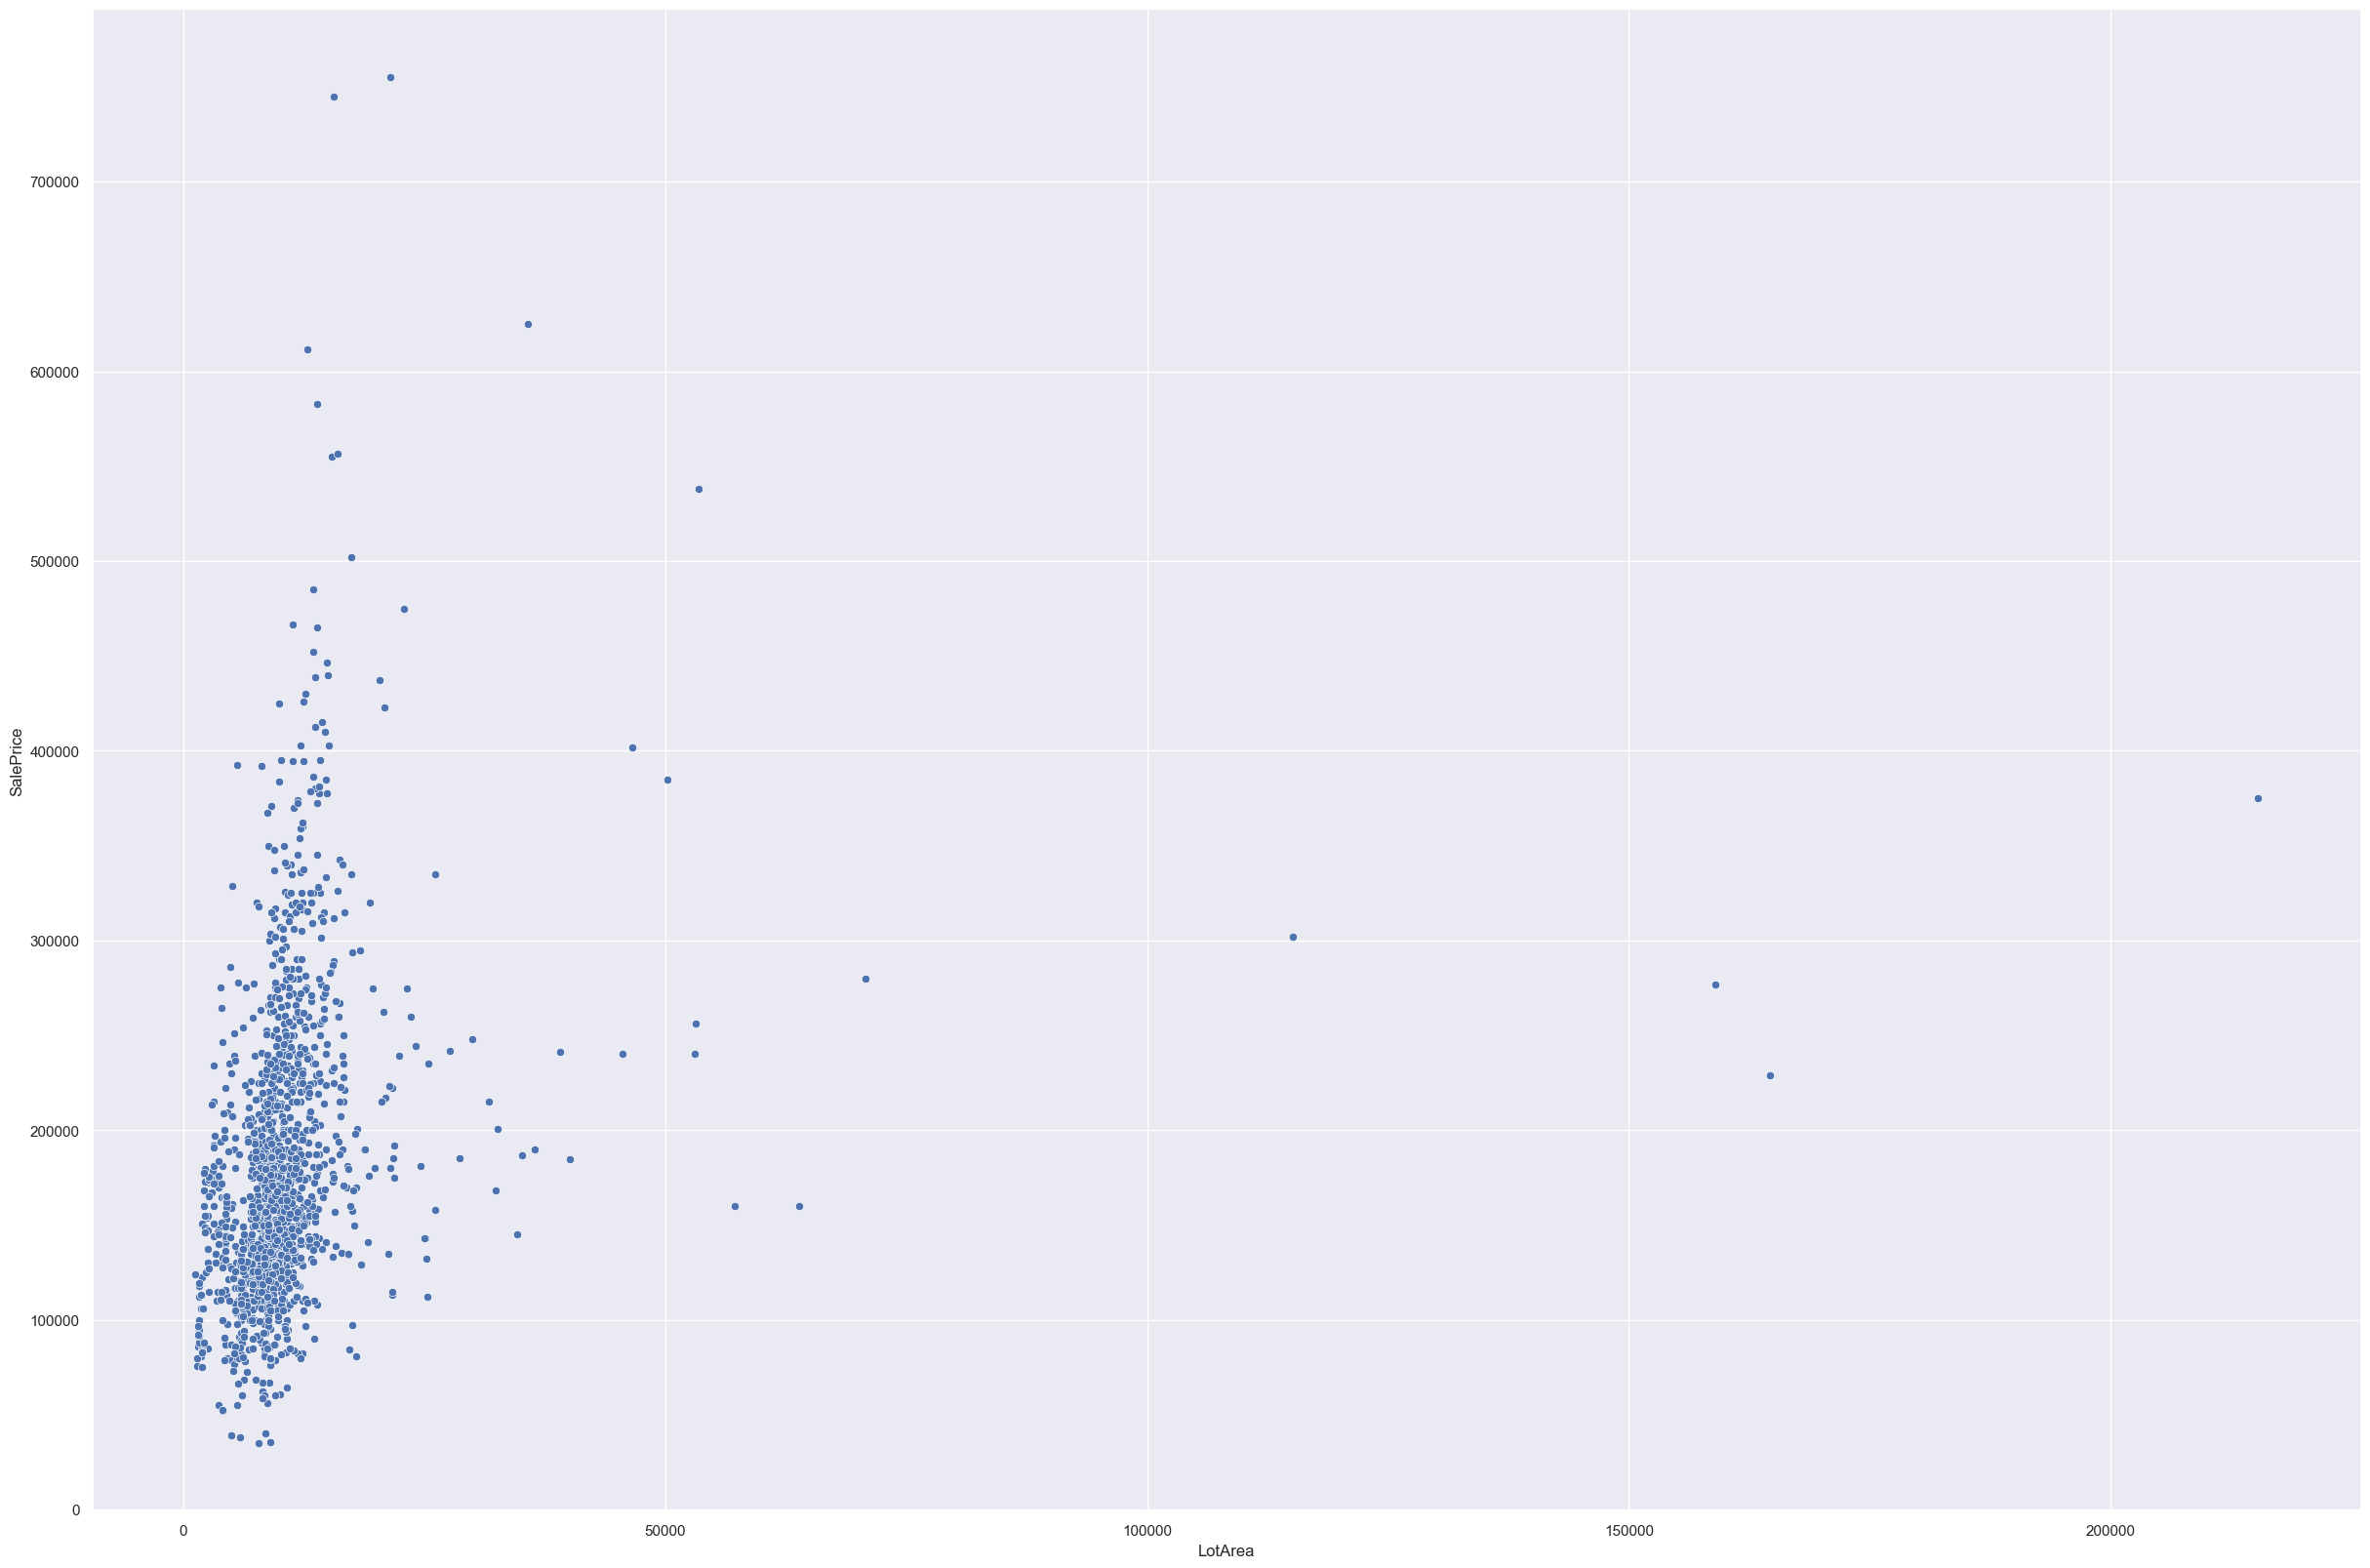

In [15]:
sns.scatterplot(x='LotArea', y='SalePrice', data=df)

In [29]:
df_num = df.select_dtypes(include=['int64', 'float64'])

In [30]:
df_num

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


In [31]:
X = df_num.drop(columns = 'SalePrice', axis = 1)

In [32]:
y = df_num.SalePrice

In [38]:
reg1 = LinearRegression()

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
reg1.fit(X_train, y_train)

LinearRegression()

In [46]:
ypred = reg1.predict(X_test)

In [58]:
rmse = mean_squared_error(y_test, ypred, squared = False)

In [59]:
print(rmse)

37327.55939423396


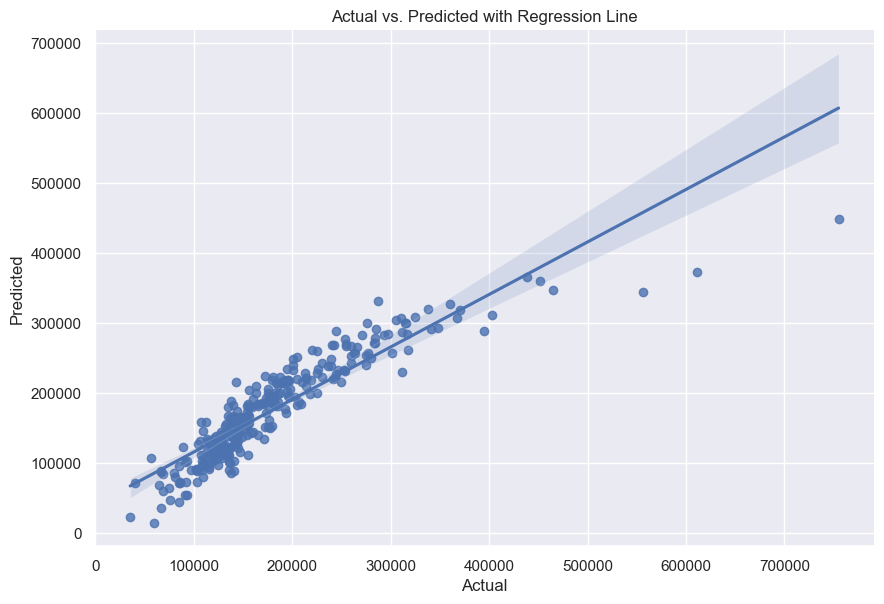

In [64]:
plot_reg1 = pd.DataFrame({'Actual': y_test, 'Predicted': ypred})
sns.lmplot(x='Actual', y='Predicted', data=plot_reg1, height=6, aspect =1.5)
plt.title('Actual vs. Predicted with Regression Line')
plt.show()

In [65]:
X2 = df_num.drop(columns = 'SalePrice', axis = 1)
y2 = df_num.SalePrice

In [77]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.2, random_state = 42)
reg2 = RandomForestClassifier(n_estimators=100, random_state=42)

In [78]:
reg2.fit(X_train, y_train)
ypred2 = reg2.predict(X_test)

In [79]:
rsme2 = np.sqrt(mean_squared_error(y_test, ypred2))

In [80]:
print("Root Mean Squared Error:", rsme2)

Root Mean Squared Error: 35885.867633153954


Text(0, 0.5, 'Predicted')

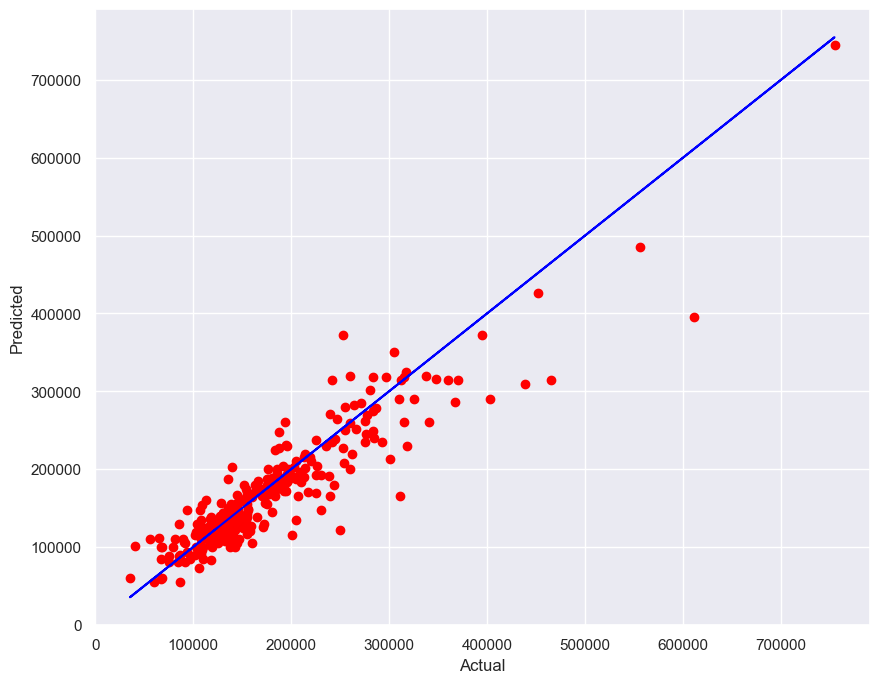

In [85]:
plt.figure(figsize = (10, 8))
plt.scatter(y_test2, ypred2, color='red')
plt.plot(y_test2, y_test2, color='blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [86]:
df_num.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [92]:
X3 = df_num[['LotArea', 'MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtUnfSF']]

In [94]:
y3 = df_num.SalePrice

In [95]:
reg3 = LinearRegression()

In [96]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

In [97]:
reg3.fit(X_train3, y_train3)

LinearRegression()

In [98]:
ypred3 = reg3.predict(X_test3)

In [99]:
rmse = mean_squared_error(y_test3, ypred3, squared = False)

In [100]:
print(rmse)

45868.56185029166


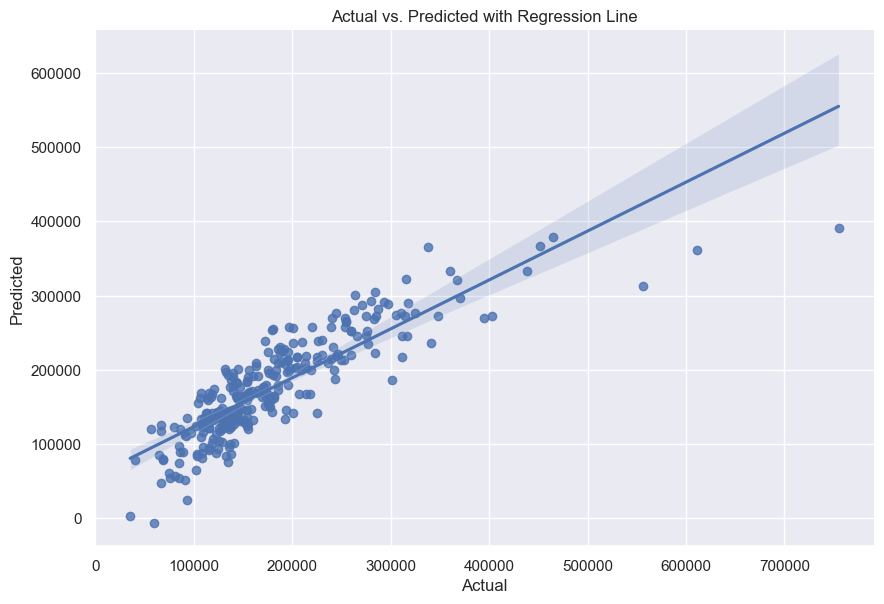

In [102]:
plot_reg3 = pd.DataFrame({'Actual': y_test3, 'Predicted': ypred3})
sns.lmplot(x='Actual', y='Predicted', data=plot_reg3, height=6, aspect =1.5)
plt.title('Actual vs. Predicted with Regression Line')
plt.show()